In [1]:
import naverAPI as napi
import json
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os

In [2]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
food = df_category[df_category['p_id'] == 50000006] # ÏùåÏãù Ïπ¥ÌÖåÍ≥†Î¶¨
b = food[['id','name']].to_dict('tight')
to_be_found = np.array(b['data'])
test_category_list = napi.listToCategoryDict(to_be_found)
print(test_category_list)
res = napi.createTrendData(client_id, client_secret, test_category_list, "2025-10-02", "2025-10-09")


[{'name': np.str_('Ï∂ïÏÇ∞Î¨º'), 'param': ['50000145']}, {'name': np.str_('ÏàòÏÇ∞Î¨º'), 'param': ['50000159']}, {'name': np.str_('ÎÜçÏÇ∞Î¨º'), 'param': ['50000160']}, {'name': np.str_('Î∞òÏ∞¨'), 'param': ['50000146']}, {'name': np.str_('ÍπÄÏπò'), 'param': ['50000147']}, {'name': np.str_('ÏùåÎ£å'), 'param': ['50000148']}, {'name': np.str_('Í≥ºÏûê/Î≤†Ïù¥Ïª§Î¶¨'), 'param': ['50000149']}, {'name': np.str_('Ïú†Í∞ÄÍ≥µÌíà'), 'param': ['50000150']}, {'name': np.str_('ÎÉâÎèô/Í∞ÑÌé∏Ï°∞Î¶¨ÏãùÌíà'), 'param': ['50000026']}, {'name': np.str_('Í±¥Í∞ïÏãùÌíà'), 'param': ['50000023']}, {'name': np.str_('Îã§Ïù¥Ïñ¥Ìä∏ÏãùÌíà'), 'param': ['50000024']}, {'name': np.str_('ÌÜµÏ°∞Î¶º/Ï∫î'), 'param': ['50011940']}, {'name': np.str_('Ï†úÍ≥º/Ï†úÎπµÏû¨Î£å'), 'param': ['50012460']}, {'name': np.str_('Ï°∞ÎØ∏Î£å'), 'param': ['50012520']}, {'name': np.str_('ÏãùÏö©Ïú†/Ïò§Ïùº'), 'param': ['50012620']}, {'name': np.str_('ÏÜåÏä§/ÎìúÎ†àÏã±'), 'param': ['50012782']}, {'name': np.str_('Í∞ÄÎ£®/Î∂ÑÎßêÎ•ò'), 'param': ['50013360']

In [3]:
with open('output/res_temp.json', 'w', encoding='utf-8') as f:
            json.dump(res, f, ensure_ascii=False, indent=4)
    

In [4]:
with open('output/res_temp.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
datalist=data['datalist']
data

{'startdate': '2025-10-02',
 'enddate': '2025-10-09',
 'datalist': [{'title': 'Ï∂ïÏÇ∞Î¨º',
   'category': ['50000145'],
   'data': [{'period': '2025-10-02', 'ratio': 34.36252990068879},
    {'period': '2025-10-03', 'ratio': 28.092679805876664},
    {'period': '2025-10-04', 'ratio': 23.503983589730456},
    {'period': '2025-10-05', 'ratio': 20.808697971536578},
    {'period': '2025-10-06', 'ratio': 19.03942170044545},
    {'period': '2025-10-07', 'ratio': 20.56579423825982},
    {'period': '2025-10-08', 'ratio': 21.452729206857327},
    {'period': '2025-10-09', 'ratio': 25.05870818959138}]},
  {'title': 'ÏàòÏÇ∞Î¨º',
   'category': ['50000159'],
   'data': [{'period': '2025-10-02', 'ratio': 37.622163012942},
    {'period': '2025-10-03', 'ratio': 32.48138412787868},
    {'period': '2025-10-04', 'ratio': 29.151254606571815},
    {'period': '2025-10-05', 'ratio': 27.158235569826417},
    {'period': '2025-10-06', 'ratio': 27.560901818337634},
    {'period': '2025-10-07', 'ratio': 29.95888205

In [5]:
data_period = []
data_ratio = []
data_title = []
for dd in datalist:
    data_title.append(dd['title'])
    temp = []
    temp1 = []
    for ddd in dd['data']:
        temp.append(ddd['ratio'])
        temp1.append(ddd['period'])
    data_ratio.append(temp)
    data_period.append(temp1)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

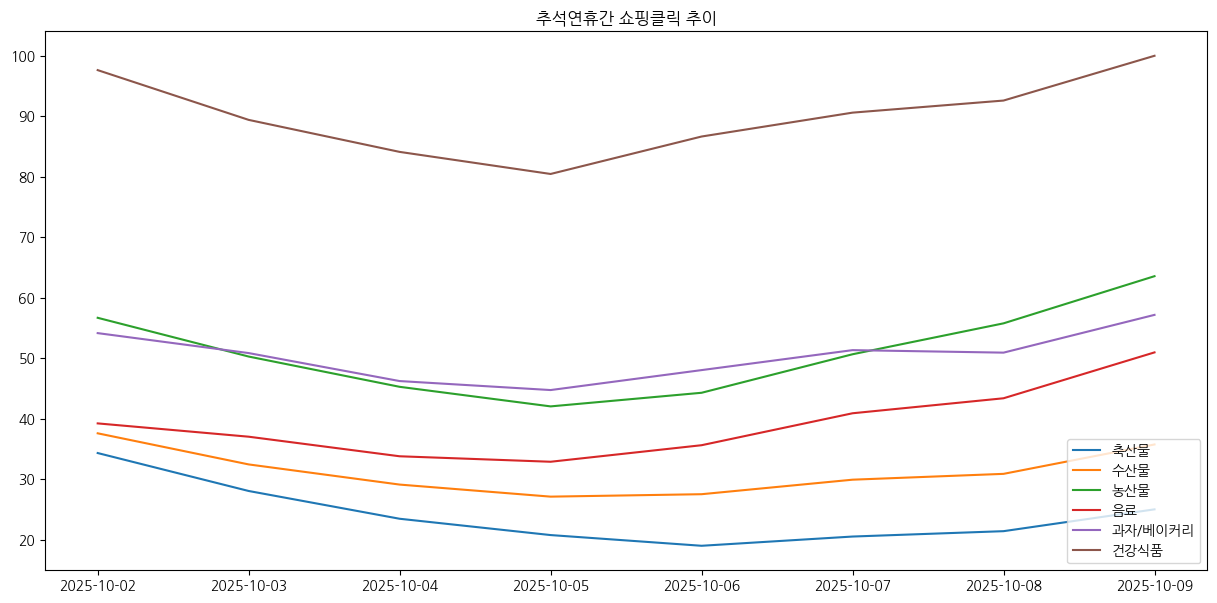

In [10]:

plt.figure(figsize=(15,7))
for i, title in enumerate(data_title):
    if max(data_ratio[i]) > 30:
        plt.plot(data_period[i], data_ratio[i], label=title)
plt.legend(loc='lower right')
plt.title('Ï∂îÏÑùÏó∞Ìú¥Í∞Ñ ÏáºÌïëÌÅ¥Î¶≠ Ï∂îÏù¥')
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏáºÌïë ÌÅ¥Î¶≠ Ï∂îÏù¥Ïàò

In [9]:
import naverAPI as napi
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [10]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
df_category[df_category['level']==1]


id  p_id     name  level
0     50000000     0     Ìå®ÏÖòÏùòÎ•ò      1
78    50000001     0     Ìå®ÏÖòÏû°Ìôî      1
413   50000002     0   ÌôîÏû•Ìíà/ÎØ∏Ïö©      1
595   50000003     0   ÎîîÏßÄÌÑ∏/Í∞ÄÏ†Ñ      1
1421  50000004     0  Í∞ÄÍµ¨/Ïù∏ÌÖåÎ¶¨Ïñ¥      1
1833  50000005     0    Ï∂úÏÇ∞/Ïú°ÏïÑ      1
2359  50000006     0       ÏãùÌíà      1
3046  50000007     0   Ïä§Ìè¨Ï∏†/Î†àÏ†Ä      1
3618  50000008     0    ÏÉùÌôú/Í±¥Í∞ï      1
5054  50000009     0  Ïó¨Í∞Ä/ÏÉùÌôúÌé∏Ïùò      1
5172  50000010     0      Î©¥ÏÑ∏Ï†ê      1
5275  50005542     0       ÎèÑÏÑú      1

In [27]:


def draw_shopping_plot(search_cat, startdate, enddate, threshold=30, gender:str=None, ages:list=None):
 # ÏùåÏãù Ïπ¥ÌÖåÍ≥†Î¶¨
    b = search_cat[['id','name']].to_dict('tight')
    to_be_found = np.array(b['data'])
    test_category_list = napi.listToCategoryDict(to_be_found)
    print(len(test_category_list))
    res = napi.createTrendData(client_id, client_secret, test_category_list, startdate, enddate, gender=gender, ages=ages)

    with open('output/res_temp.json', 'w', encoding='utf-8') as f:
                json.dump(res, f, ensure_ascii=False, indent=4)

    results = res['datalist']
    all_data = []
    DEFAULT_GROUP = "Ï†ÑÏ≤¥" 

    # Ï§ëÏ≤©Îêú Íµ¨Ï°∞Î•º ÏàúÌöåÌïòÎ©∞ 'title'Í≥º 'group' Ï†ïÎ≥¥Î•º Ïó∞Í≤∞
    for item in results:
        current_title = item['title']
        item_data = item['data']
        
        # ------------------------------------------------------------------
        # üö® ÌïµÏã¨ Î≥ÄÍ≤Ω Î°úÏßÅ: Title Î∏îÎ°ùÏùò Ï≤´ Î≤àÏß∏ Ìï≠Î™©ÏùÑ ÌôïÏù∏ÌïòÏó¨ ÏùºÍ¥Ñ Ï≤òÎ¶¨
        # ------------------------------------------------------------------
        
        # data Î¶¨Ïä§Ìä∏Í∞Ä ÎπÑÏñ¥ÏûàÏßÄ ÏïäÏùÄÏßÄ ÌôïÏù∏
        if item_data:
            # Ï≤´ Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞ Ìï≠Î™©Ïóê 'group' ÌÇ§Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
            is_group_present = 'group' in item_data[0]
        else:
            # data Î¶¨Ïä§Ìä∏Í∞Ä ÎπÑÏñ¥ÏûàÏúºÎ©¥ Í±¥ÎÑàÎúÄ
            continue 
        
        for sub_item in item_data:
            
            # 'group' ÌÇ§Í∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞: Ïã§Ï†ú Í∞íÏùÑ ÏÇ¨Ïö©
            if is_group_present:
                current_group = sub_item['group']
            # 'group' ÌÇ§Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞: ÏùºÍ¥ÑÏ†ÅÏúºÎ°ú Í∏∞Î≥∏Í∞í ÏÇ¨Ïö©
            else:
                current_group = DEFAULT_GROUP

            row = {
                'title': current_title,
                'group': current_group, 
                'period': sub_item['period'],
                'ratio': sub_item['ratio']
            }
            all_data.append(row)

    # DataFrame ÏÉùÏÑ± Î∞è periodÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
    df = pd.DataFrame(all_data)
    df['period'] = pd.to_datetime(df['period'])

    print("--- Ï§ÄÎπÑÎêú DataFrame (Title Î∏îÎ°ùÎ≥Ñ Group Ï≤òÎ¶¨) ---")
    print(df)
    print("\n--- 'group' Ïª¨ÎüºÏùò Í≥†Ïú† Í∞í ---")
    print(df['group'].unique())

    plt.figure(figsize=(12, 7))

    # 2. 'title'Í≥º 'group' Ïª¨ÎüºÏùÑ Ï°∞Ìï©ÌïòÏó¨ Í≥†Ïú†Ìïú Í∑∏Î£πÌïë Í∏∞Ï§Ä ÏÉùÏÑ±
    unique_combinations = df.groupby(['title', 'group']).groups.keys()
    # print(f"\n--- Î∞úÍ≤¨Îêú Í≥†Ïú† Ï°∞Ìï©: {list(unique_combinations)} ---")

    # 3. Í∞Å Ï°∞Ìï©Î≥ÑÎ°ú Î∞òÎ≥µÌïòÎ©∞ ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    for title_name, group_name in unique_combinations:
        # ÌòÑÏû¨ Ï°∞Ìï©Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
        df_combo = df[(df['title'] == title_name) & (df['group'] == group_name)]
        
        # Î≤îÎ°ÄÏóê ÌëúÏãúÌï† ÎùºÎ≤® ÏÉùÏÑ± (Ïòà: 'Ìå®ÏÖòÏùòÎ•ò - 20ÎåÄ', 'ÌôîÏû•Ìíà/ÎØ∏Ïö© - Ï†ÑÏ≤¥')
        label_name = f"{title_name} - {group_name}"
        
        # plot Ìï®Ïàò Ïã§Ìñâ
        if max(df_combo['ratio'])>threshold:
            plt.plot(
                df_combo['period'], 
                df_combo['ratio'], 
                marker='o',         
                linestyle='-',      
                label=label_name    # Ï°∞Ìï©Î≥Ñ ÎùºÎ≤®
        )

    # 4. Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
    plt.title('Ratio Trend by Category and Age Group (Title Block Check)')
    plt.xlabel('Period')
    plt.ylabel('Ratio Value')
    plt.legend(title='Combination', bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.grid(True, linestyle='--')
    plt.xticks(rotation=45) 
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

    # data_period = []
    # data_ratio = []
    # data_title = []
    # data_group = []
    # for dd in datalist:
    #     data_title.append(dd['title'])

    #     temp = []
    #     temp1 = []
    #     for ddd in dd['data']:
    #         temp.append(ddd['ratio'])
    #         temp1.append(ddd['period'])
    #         if 'group' in ddd:
    #             data_group.append(ddd['group'])
    #     data_ratio.append(temp)
    #     data_period.append(temp1)


    # plt.figure(figsize=(15,7))
    # for i, title in enumerate(data_title):
    #     #print(title)
    #     #print(data_ratio[i])
    #     if len(data_group) != 0:   
    #         if max(data_ratio[i])>threshold:
    #             plt.plot(data_period[i], data_ratio[i], label=title+data_group[i])
    #     else:
    #          if max(data_ratio[i])>threshold:
    #             plt.plot(data_period[i], data_ratio[i], label=title)
    # plt.legend()
    # plt.xticks(rotation = 45, ha ='right')
    # ax = plt.gca()

    # # Î™®Îì† xÏ∂ï Î†àÏù¥Î∏î Í∞ùÏ≤¥Î•º Î¶¨Ïä§Ìä∏Î°ú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    # xticklabels = ax.get_xticklabels()

    # # Í∞ïÏ°∞ÌïòÍ≥† Ïã∂ÏùÄ Î¨∏ÏûêÏó¥ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
    # highlight_name = ["2025-10-03", "2025-10-04","2025-10-05","2025-10-06","2025-10-07","2025-10-08","2025-10-09"]
    # highlight_color = 'red'

    # # Î†àÏù¥Î∏î Í∞ùÏ≤¥Î•º ÏàúÌöåÌïòÎ©∞ Ï°∞Í±¥ ÌôïÏù∏
    # for label in xticklabels:
    #     # label.get_text()Î°ú Î†àÏù¥Î∏îÏùò Î¨∏ÏûêÏó¥ ÎÇ¥Ïö©ÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
    #     if label.get_text() in highlight_name:
    #         # Ï°∞Í±¥Ïù¥ ÏùºÏπòÌïòÎ©¥ ÏÉâÏÉÅ(color)Í≥º Í∏ÄÍº¥ ÍµµÍ∏∞(fontweight)Î•º Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
    #         label.set_color(highlight_color)
    #         label.set_fontweight('bold')
    #         label.set_fontsize(12) # ÌÅ¨Í∏∞ÎèÑ Î≥ÄÍ≤Ω Í∞ÄÎä•
    # plt.show()


## ÏÇ¨ÎûåÎì§Ïù¥ Í∞ÄÏû• ÎßéÏù¥ ÎàÑÎ•∏ ÌíàÎ™©ÏùÄ?
- Ï∂îÏÑù Ï†ÑÌõÑÎ°ú ÏùåÏãùÏù¥ ÎßéÏùÑÍ±∞ Í∞ôÏùå $\Rightarrow$ ÏÉùÌôú/Í±¥Í∞ïÏù¥ ÎßéÏïòÎã§
- ÏùòÎ•òÏôÄ ÏãùÌíàÏù¥ 10/3ÏùºÏóê ÍµêÏ∞®Îê®
- Ï†ÑÏ≤¥ ÌÅ¥Î¶≠ÏàòÎäî Ï∂îÏÑù Ïó∞Ìú¥Î≥¥Îã§ Ï†ÑÌõÑÎ°ú ÎßéÏïòÎã§
- ÏùòÎ•ò 18Ïùº - 19ÏùºÏóê ÌÅ¥Î¶≠Ïàò Í∏âÍ≤© Ï¶ùÍ∞Ä $\Rightarrow$ ÎÇ†Ïî®ÏòÅÌñ•(Í∞ëÏûêÍ∏∞ Ï∂îÏõåÏßàÎïå) -> ÏïÑÎßà Í≤®Ïö∏ÏùòÎ•òÎ•º ÎßéÏù¥ Î≥¥ÏßÄ ÏïäÏïòÏùÑÍ∞Ä

            id  p_id     name  level
0     50000000     0     Ìå®ÏÖòÏùòÎ•ò      1
78    50000001     0     Ìå®ÏÖòÏû°Ìôî      1
413   50000002     0   ÌôîÏû•Ìíà/ÎØ∏Ïö©      1
595   50000003     0   ÎîîÏßÄÌÑ∏/Í∞ÄÏ†Ñ      1
1421  50000004     0  Í∞ÄÍµ¨/Ïù∏ÌÖåÎ¶¨Ïñ¥      1
1833  50000005     0    Ï∂úÏÇ∞/Ïú°ÏïÑ      1
2359  50000006     0       ÏãùÌíà      1
3046  50000007     0   Ïä§Ìè¨Ï∏†/Î†àÏ†Ä      1
3618  50000008     0    ÏÉùÌôú/Í±¥Í∞ï      1
5054  50000009     0  Ïó¨Í∞Ä/ÏÉùÌôúÌé∏Ïùò      1
5275  50005542     0       ÎèÑÏÑú      1
11
--- Ï§ÄÎπÑÎêú DataFrame (Title Î∏îÎ°ùÎ≥Ñ Group Ï≤òÎ¶¨) ---
    title group     period      ratio
0    Ìå®ÏÖòÏùòÎ•ò    Ï†ÑÏ≤¥ 2025-09-26  42.138105
1    Ìå®ÏÖòÏùòÎ•ò    Ï†ÑÏ≤¥ 2025-09-27  45.969084
2    Ìå®ÏÖòÏùòÎ•ò    Ï†ÑÏ≤¥ 2025-09-28  56.465664
3    Ìå®ÏÖòÏùòÎ•ò    Ï†ÑÏ≤¥ 2025-09-29  46.831480
4    Ìå®ÏÖòÏùòÎ•ò    Ï†ÑÏ≤¥ 2025-09-30  45.073904
..    ...   ...        ...        ...
259    ÎèÑÏÑú    Ï†ÑÏ≤¥ 2025-10-15  11.276200
260    ÎèÑÏÑú    Ï†ÑÏ≤¥ 2025

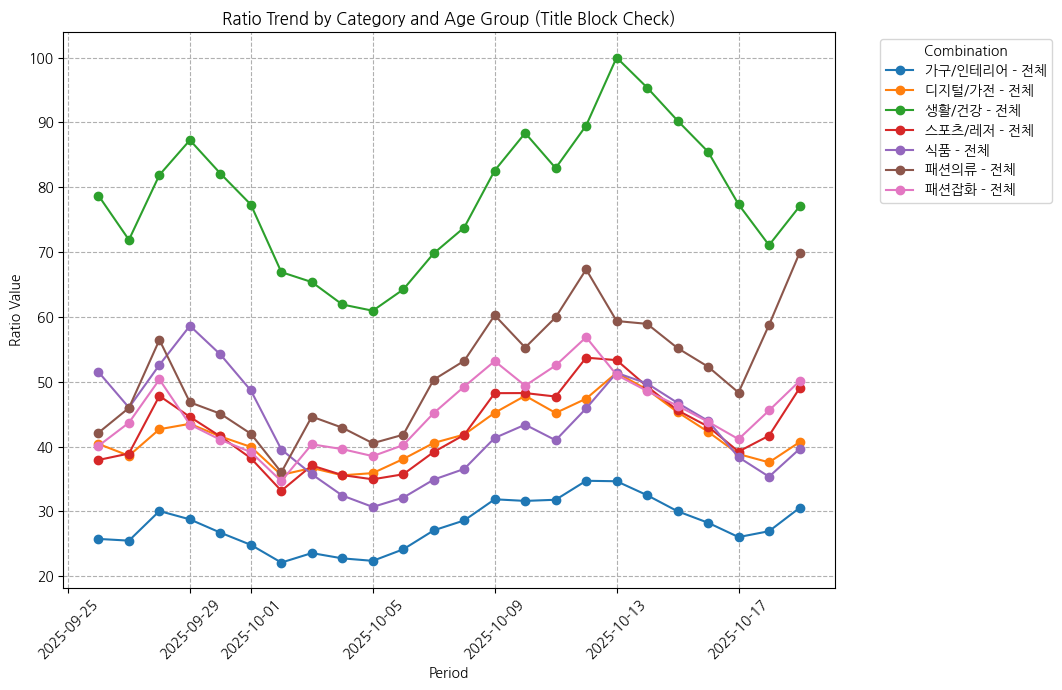

In [28]:

search_cat = df_category[(df_category['level'] == 1) & (df_category['name'] != 'Î©¥ÏÑ∏Ï†ê')]
print(search_cat)
draw_shopping_plot(search_cat, "2025-09-26", "2025-10-19")

## ÏÉùÌôú/Í±¥Í∞ïÏù¥ Î≠êÍ∞Ä ÎÜíÏùÄÍ±∞ÏßÄ?
- Ï∂îÏÑùÎïå ÏÑ†Î¨ºÎ°ú ÏöïÏã§ÏÑ∏Ìä∏ÎÇò ÏïÑÎãàÎ©¥ Ìú¥ÏßÄÍ∞ôÏùÄÍ≤ÉÎì§?, Í∑∏Îü¨Í∏∞ÏóêÎäî Ï∂îÏÑù Ïù¥ÌõÑÎ°ú Îçî Ïò¨ÎùºÍ∞îÎäîÎç∞

**Í≤∞Í≥º**
- Í≥µÍµ¨Í∞Ä ÎÜíÎã§. Ïù¥Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÏùå $\Rightarrow$ Í≥µÍµ¨Î∂ÑÎ•òÏóê ÎßéÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏûàÏùÑÍ±∞ Í∞ôÎã§. $\Rightarrow$ ÏÉùÌôú/Í±¥Í∞ïÏùò ÌíàÎ™©Ïù¥ ÎßéÏïÑÏÑú Í∑∏Îü∞ÎìØ 

In [30]:
search_cat = df_category[df_category['p_id'] == 50000008]
print(len(search_cat))
draw_shopping_plot(search_cat, "2025-09-26", "2025-10-19")

34
34


HTTPError: HTTP Error 429: Too Many Requests

In [31]:

print(df_category[df_category['name']=='Ï£ºÎ∞©Ïö©Ìíà'] )
search_cat = df_category[(df_category['p_id'] == 50000061) | (df_category['p_id'] == 50000165)]
print(len(search_cat))
draw_shopping_plot(search_cat, "2025-09-20", "2025-10-19", 50)

            id      p_id  name  level
4503  50000061  50000008  Ï£ºÎ∞©Ïö©Ìíà      2
35
35


HTTPError: HTTP Error 429: Too Many Requests

## Îã§ÏùåÏùÄ ÏùòÎ•òÏóê ÎåÄÌï¥ÏÑú Î≥¥Ïûê
**Í≤∞Í≥º**
- ÏïÑÍπå Î¥§ÎìØÏù¥ ÎÇ†Ïî® ÎïåÎ¨∏Ïóê 10/18, 10/19Ïóê ÌÅ¥Î¶≠Ïàò Í∏âÏ¶ù
- ÎÇ®ÏÑ±ÏùòÎ•òÏôÄ Ïó¨ÏÑ±ÏùòÎ•ò Í≤ÄÏÉâ Ï∂îÏù¥ ÎπÑÏä∑
    - Í∂ÅÍ∏àÌïúÏ†ê : ÎÇ®Ïûê, Ïó¨ÏûêÎäî Î¨¥Ïä® ÏùòÎ•òÎ•º ÎçîÎßéÏù¥ Í≤ÄÏÉâÌñàÏùÑÍπå



In [32]:

print(df_category[df_category['name']=='Ìå®ÏÖòÏùòÎ•ò'] )
search_cat = df_category[(df_category['p_id'] == 50000000)]
print(len(search_cat))
print(search_cat['name'])
draw_shopping_plot(search_cat, "2025-09-20", "2025-10-19", threshold=0, gender="f")

         id  p_id  name  level
0  50000000     0  Ìå®ÏÖòÏùòÎ•ò      1
4
1          Ïó¨ÏÑ±ÏùòÎ•ò
23    Ïó¨ÏÑ±Ïñ∏ÎçîÏõ®Ïñ¥/Ïû†Ïò∑
48         ÎÇ®ÏÑ±ÏùòÎ•ò
66    ÎÇ®ÏÑ±Ïñ∏ÎçîÏõ®Ïñ¥/Ïû†Ïò∑
Name: name, dtype: object
4


HTTPError: HTTP Error 429: Too Many Requests

         id  p_id  name  level
0  50000000     0  Ìå®ÏÖòÏùòÎ•ò      1
4
1          Ïó¨ÏÑ±ÏùòÎ•ò
23    Ïó¨ÏÑ±Ïñ∏ÎçîÏõ®Ïñ¥/Ïû†Ïò∑
48         ÎÇ®ÏÑ±ÏùòÎ•ò
66    ÎÇ®ÏÑ±Ïñ∏ÎçîÏõ®Ïñ¥/Ïû†Ïò∑
Name: name, dtype: object
4


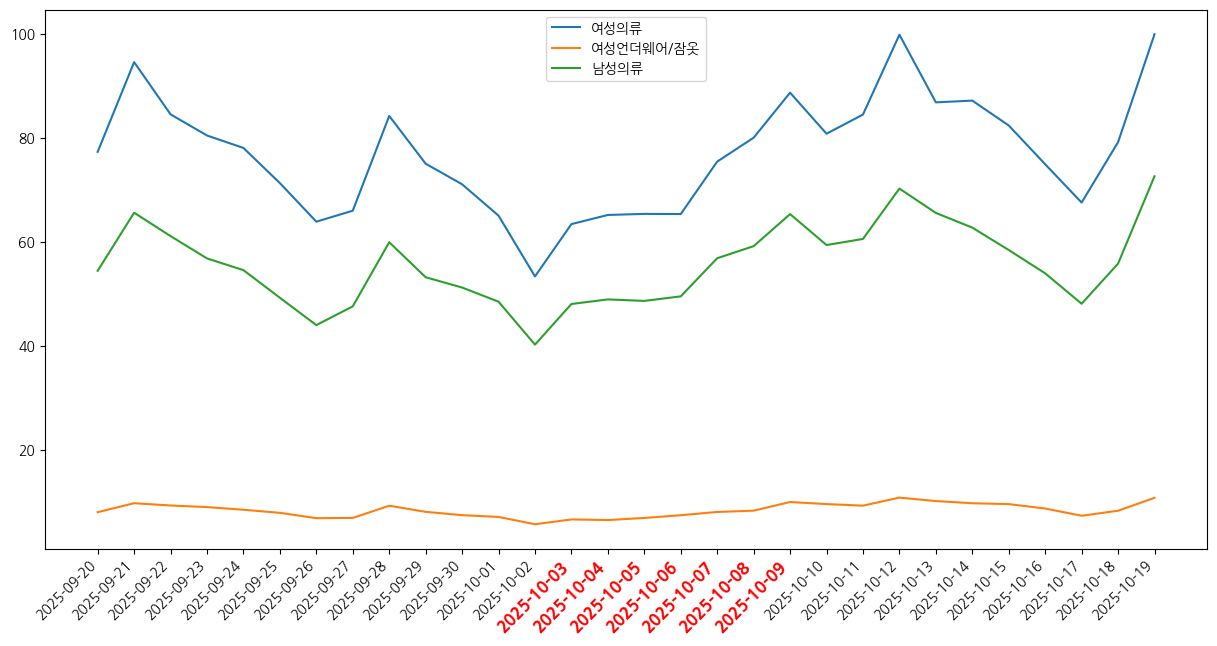

In [16]:

print(df_category[df_category['name']=='Ìå®ÏÖòÏùòÎ•ò'] )
search_cat = df_category[(df_category['p_id'] == 50000000)]
print(len(search_cat))
print(search_cat['name'])

draw_shopping_plot(search_cat, "2025-09-20", "2025-10-19", threshold=10, ages=['10', '20', '30'])